# Holiday Package Prediction

"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
%matplotlib inline
warnings.filterwarnings('ignore')

# Dataset

In [2]:
df = pd.read_csv('Travel.csv')
df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Data Cleaning
0. Format of categorical column values
1. Handling Missing Data
2. Handling Duplicates
3. Check Data type
4. Understand the Dataset

# We will check all the Categories

# Gender Feature

In [4]:
df['Gender'].value_counts()
# Here we can see that the Female and Fe male is there we need to combine them

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

# Marital Status Feature

In [5]:
df['MaritalStatus'].value_counts()
# Here again the single and the divorced can be combined together in single

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

# Type of Contact Feature

In [6]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

# Cleaning the Categories of Features

In [7]:
df['Gender'] = df['Gender'].replace('Fe Male','Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single','Unmarried')
print(df['Gender'].value_counts())
print(df['MaritalStatus'].value_counts())

Gender
Male      2916
Female    1972
Name: count, dtype: int64
MaritalStatus
Married      2340
Unmarried    1598
Divorced      950
Name: count, dtype: int64


# Checking Missing Values

In [8]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

# Features with the % of null values

In [9]:
features_na = [features for features in df.columns if df[features].isnull().sum() >= 1]

for cols in features_na:
    print(f'{cols} = {np.round(df[cols].isnull().mean()*100,5)}% Missing Values')

Age = 4.62357% Missing Values
TypeofContact = 0.51146% Missing Values
DurationOfPitch = 5.13502% Missing Values
NumberOfFollowups = 0.92062% Missing Values
PreferredPropertyStar = 0.53191% Missing Values
NumberOfTrips = 2.86416% Missing Values
NumberOfChildrenVisiting = 1.35025% Missing Values
MonthlyIncome = 4.76678% Missing Values


# Numerical Features from Nan containing features's statistical analysis

In [10]:
df[features_na].select_dtypes(exclude='object').describe()
# If the mean and the 50% percentile of the dataset doesn't have much differnce then we can say that there are outliers but they donot affect much

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


# Imputations of Nan Values
1- Impute the Age column with Median  
2- Impute the Duration of pitch with mode  
3- Impute the Number of Followups with median  
4- Impute the Prefferd property star with mode  
5- Impute the Number of Trips with median  
6- Impute the Number of children visiting with mode  
7- Impute the Monthly Income with Median.  

- Basic Idea --> If there is any categorical feature then we have done mode imputation and when it is an numerical column we have done the median value


In [11]:
# Age Column
df.Age.fillna(df.Age.median() , inplace = True)

# DurationOfPitch Column
df.DurationOfPitch.fillna(df.DurationOfPitch.mode()[0] , inplace = True)

# NumberofFollowups Column
df.NumberOfFollowups.fillna(df.NumberOfFollowups.median() , inplace = True)

# PreferredPropertyStar Column
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace= True)

# NumberOfTrips Column
df.NumberOfTrips.fillna(df.NumberOfTrips.median() , inplace = True)

# NumberOfChildrenVisitng Column
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace = True)

# MonthlyIncome Column
df.MonthlyIncome.fillna(df.MonthlyIncome.median() , inplace = True)

# TypeOfContact Column
df.TypeofContact.fillna(df.TypeofContact.mode()[0] , inplace = True)

In [12]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [13]:
# As the Coustomer Id is not much useful feature we going to drop it
df.drop('CustomerID',axis = 1 , inplace = True)

In [14]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# Feature Enginnering

In [15]:
# as there was 2 feature representing numbers of person visit and the number of children visitng we combined them toghter to form total visiting.
df['TotalVisting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns = ['NumberOfChildrenVisiting' ,'NumberOfPersonVisiting'] , axis = 1 , inplace = True)

In [16]:
# Getting All the Numerical Features
numerical_cols = [features for features in df.columns if df[features].dtypes!='O']
numerical_cols , len(numerical_cols)

(['ProdTaken',
  'Age',
  'CityTier',
  'DurationOfPitch',
  'NumberOfFollowups',
  'PreferredPropertyStar',
  'NumberOfTrips',
  'Passport',
  'PitchSatisfactionScore',
  'OwnCar',
  'MonthlyIncome',
  'TotalVisting'],
 12)

In [17]:
# getting Categorical Columns
cat_cols = [features for features in df.columns if df[features].dtypes == 'O']
cat_cols , len(cat_cols)

(['TypeofContact',
  'Occupation',
  'Gender',
  'ProductPitched',
  'MaritalStatus',
  'Designation'],
 6)

In [18]:
# Discrete Features - Like Discrete Values in some categories but fix numbers of categories like 15-20 categories
discrete_cols = [features for features in numerical_cols if len(df[features].unique())<=25]
discrete_cols , len(discrete_cols)

(['ProdTaken',
  'CityTier',
  'NumberOfFollowups',
  'PreferredPropertyStar',
  'NumberOfTrips',
  'Passport',
  'PitchSatisfactionScore',
  'OwnCar',
  'TotalVisting'],
 9)

In [19]:
# Continous Features - Its like an continous values 
continous_cols = [features for features in numerical_cols if features not in discrete_cols]
continous_cols , len(continous_cols)

(['Age', 'DurationOfPitch', 'MonthlyIncome'], 3)

In [20]:
from sklearn.model_selection import train_test_split
X = df.drop(['ProdTaken'],axis = 1)
Y = df['ProdTaken']

In [21]:
Y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

# Observation
- Here we may think the dataset is imbalanced but when we are using ensemble technique's algorithm they perfrom well even on imbalanced data

In [22]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [23]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2 , random_state=41)

In [24]:
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude = 'object').columns

In [ ]:
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import ColumnTransformer
numerical_transformer = StandardScaler()
cate_transformer = OneHotEncoder(drop = 'first')

preprocessor = ColumnTransformer([("OneHotEncoder" , cate_transformer , cat_cols) , ("StandardScaler",numerical_transformer , num_cols)])

# In column tranformer we give value in form of list in which first we write the name of Transformator , then the object of transformer and then the column for particular transformer.
# It will convert the dataframe into an 2-d array.

In [34]:
# Checking the parameter of the preproccesor column transformer
preprocessor.get_params

<bound method ColumnTransformer.get_params of ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisting'],
      dtype='object'))])>

In [ ]:
X_train = preprocessor.fit_transform(X_train)
# Fit_tranform on X_train

X_test = preprocessor.transform(X_test)
# Transform on X_test

In [ ]:
# Using dataframe for checking the data
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.713516,-1.086878,-0.704747,-0.718477,-1.210803,-0.638744,-0.062830,0.784242,-1.193591,-0.774035
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.470317,-0.734567,-0.704747,-0.718477,-1.210803,-0.638744,-1.533872,0.784242,-0.750690,-0.065590
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.713516,0.909551,-0.704747,0.540710,-0.666074,-0.638744,-0.062830,0.784242,-0.462285,0.642855
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.713516,-0.617130,0.289323,-0.718477,-0.666074,-0.638744,-0.798351,0.784242,0.544394,-0.065590
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.713516,1.849048,0.289323,0.540710,1.512842,-0.638744,-0.062830,0.784242,-1.134285,0.642855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.470317,-0.264819,-0.704747,-0.718477,0.968113,-0.638744,-0.798351,-1.275117,-0.189745,-0.774035
3906,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.470317,-0.264819,0.289323,-0.718477,0.423384,1.565572,1.408213,-1.275117,-0.484949,0.642855
3907,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.713516,0.322366,1.283393,0.540710,-0.121345,-0.638744,0.672692,0.784242,0.306984,1.351300
3908,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.713516,-0.734567,-0.704747,-0.718477,-1.210803,1.565572,-0.062830,0.784242,-0.728403,0.642855


# Model Training

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , classification_report , ConfusionMatrixDisplay, precision_score , f1_score , recall_score , roc_auc_score , roc_curve

In [48]:
models = {
    "Random Forest" : RandomForestClassifier(),
    "Decision tree" : DecisionTreeClassifier(),
    "Logistic Regression" : LogisticRegression(),
    "SVM" : SVC()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    
    # Fitting the Model on data
    model.fit(X_train,Y_train)
    
    # Predictions
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    
    # Perfromance on Training Data
    model_train_accuracy = accuracy_score(Y_train , Y_pred_train)
    model_train_f1 = f1_score(Y_train , Y_pred_train , average='weighted')
    model_train_precision = precision_score(Y_train,Y_pred_train)
    model_train_recall = recall_score(Y_train , Y_pred_train)
    model_train_roc_auc_score = roc_auc_score(Y_train , Y_pred_train)
    
    # Performane on Test Data
    model_test_accuracy = accuracy_score(Y_test, Y_pred_test)
    model_test_f1 = f1_score(Y_test , Y_pred_test , average='weighted')
    model_test_precision = precision_score(Y_test,Y_pred_test)
    model_test_recall = recall_score(Y_test , Y_pred_test)
    model_test_roc_auc_score = roc_auc_score(Y_test , Y_pred_test)
    
    print("****",list(models.keys())[i],"****")
    
    print("Model Performance for training set")
    print("Accuracy: {:.4f}" . format(model_train_accuracy))
    print("F1-Score: {:.4f}".format(model_train_f1))
    print("Precision: {:.4f}".format(model_train_precision))
    print("Recall: {:.4f}".format(model_train_recall))
    print("Roc Auc Score: {:.4f}".format(model_train_roc_auc_score)) 
    
    print("-"*35)
    
    print("Model Performance for Test set") 
    print("Accuracy: {:.4f}" . format(model_test_accuracy))
    print("F1-Score: {:.4f}".format(model_test_f1))
    print("Precision: {:.4f}".format(model_test_precision))
    print("Recall: {:.4f}".format(model_test_recall))
    print("Roc Auc Score: {:.4f}".format(model_test_roc_auc_score))   
    
    print("="*35)
    print("\n")
    
    

**** Random Forest ****
Model Performance for training set
Accuracy: 1.0000
F1-Score: 1.0000
Precision: 1.0000
Recall: 1.0000
Roc Auc Score: 1.0000
-----------------------------------
Model Performance for Test set
Accuracy: 0.9243
F1-Score: 0.9195
Precision: 0.8992
Recall: 0.6554
Roc Auc Score: 0.8196


**** Decision tree ****
Model Performance for training set
Accuracy: 1.0000
F1-Score: 1.0000
Precision: 1.0000
Recall: 1.0000
Roc Auc Score: 1.0000
-----------------------------------
Model Performance for Test set
Accuracy: 0.8988
F1-Score: 0.8995
Precision: 0.7120
Recall: 0.7401
Roc Auc Score: 0.8370


**** Logistic Regression ****
Model Performance for training set
Accuracy: 0.8453
F1-Score: 0.8218
Precision: 0.6983
Recall: 0.3271
Roc Auc Score: 0.6469
-----------------------------------
Model Performance for Test set
Accuracy: 0.8476
F1-Score: 0.8202
Precision: 0.6944
Recall: 0.2825
Roc Auc Score: 0.6275


**** SVM ****
Model Performance for training set
Accuracy: 0.8944
F1-Score: 

# Hyperparameter Tuining

In [52]:
rf_param = {"max_depth":[5,8,15,None,10] , "max_features" : [5,7,"auto",8] , "min_samples_split" :[2,8,15,20] , "n_estimators" :[100 , 200 , 500 , 1000]}
rf_param

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [53]:
randomCv_models = [("RF",RandomForestClassifier(),rf_param),]
randomCv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [55]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}

for name,model,params in randomCv_models:
    rand = RandomizedSearchCV(estimator=model , param_distributions=params , cv = 3 , n_iter = 100 , verbose = 2 , n_jobs = -1)
    rand.fit(X_train , Y_train)
    model_param[name] = rand.best_params_
    
for model_name in model_param:
    print(f"----------------------- Best Params for {model_name} ---------------------------")
    print(model_param[model_name])


Fitting 3 folds for each of 100 candidates, totalling 300 fits
----------------------- Best Params for RF ---------------------------
{'n_estimators': 100, 'min_samples_split': 2, 'max_features': 8, 'max_depth': 15}


In [56]:
models = {
    "Random Forest" : RandomForestClassifier(n_estimators= 100, min_samples_split= 2, max_features = 8, max_depth = 15),
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    
    # Fitting the Model on data
    model.fit(X_train,Y_train)
    
    # Predictions
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    
    # Perfromance on Training Data
    model_train_accuracy = accuracy_score(Y_train , Y_pred_train)
    model_train_f1 = f1_score(Y_train , Y_pred_train , average='weighted')
    model_train_precision = precision_score(Y_train,Y_pred_train)
    model_train_recall = recall_score(Y_train , Y_pred_train)
    model_train_roc_auc_score = roc_auc_score(Y_train , Y_pred_train)
    
    # Performane on Test Data
    model_test_accuracy = accuracy_score(Y_test, Y_pred_test)
    model_test_f1 = f1_score(Y_test , Y_pred_test , average='weighted')
    model_test_precision = precision_score(Y_test,Y_pred_test)
    model_test_recall = recall_score(Y_test , Y_pred_test)
    model_test_roc_auc_score = roc_auc_score(Y_test , Y_pred_test)
    
    print("****",list(models.keys())[i],"****")
    
    print("Model Performance for training set")
    print("Accuracy: {:.4f}" . format(model_train_accuracy))
    print("F1-Score: {:.4f}".format(model_train_f1))
    print("Precision: {:.4f}".format(model_train_precision))
    print("Recall: {:.4f}".format(model_train_recall))
    print("Roc Auc Score: {:.4f}".format(model_train_roc_auc_score)) 
    
    print("-"*35)
    
    print("Model Performance for Test set") 
    print("Accuracy: {:.4f}" . format(model_test_accuracy))
    print("F1-Score: {:.4f}".format(model_test_f1))
    print("Precision: {:.4f}".format(model_test_precision))
    print("Recall: {:.4f}".format(model_test_recall))
    print("Roc Auc Score: {:.4f}".format(model_test_roc_auc_score))   
    
    print("="*35)
    print("\n")
    
    

**** Random Forest ****
Model Performance for training set
Accuracy: 0.9995
F1-Score: 0.9995
Precision: 1.0000
Recall: 0.9973
Roc Auc Score: 0.9987
-----------------------------------
Model Performance for Test set
Accuracy: 0.9335
F1-Score: 0.9302
Precision: 0.9058
Recall: 0.7062
Roc Auc Score: 0.8450




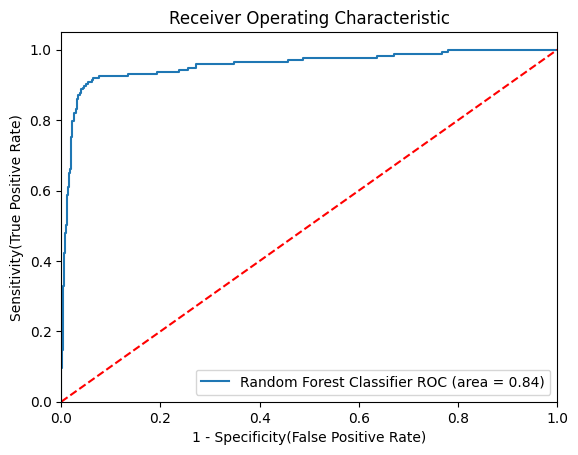

In [58]:
plt.figure()

# Add the models to the list that we want to view on the ROC plot 

auc_models = [{
    'label':'Random Forest Classifier',
    'model':RandomForestClassifier(n_estimators=200 , min_samples_split=2 , max_features=7 , max_depth=15),
    'auc' : 0.8450
    },]

# Create loop through all models

for algo in auc_models:
    model = algo['model']              # Select the model
    model.fit(X_train , Y_train)       # Train the dataset
    
    # compute FPR TPR and threshold
    fpr , tpr , thresholds = roc_curve(Y_test , model.predict_proba(X_test)[:,1])
    
    # Calculating Area under Curve
    plt.plot(fpr,tpr,label = '%s ROC (area = %0.2f)' % (algo['label'] , algo['auc']))
    
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("1 - Specificity(False Positive Rate)")
    plt.ylabel("Sensitivity(True Positive Rate)")
    plt.title("Receiver Operating Characteristic")
    plt.legend(loc="lower right")
    plt.savefig("auc.png")
    plt.show()